In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

In [2]:
df_country_wise_latest = pd.read_csv ("/content/country_wise_latest.csv")
df_country_wise_latest



,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


**Date wise combined**

In [3]:
df_covid_19_clean_complete = pd.read_csv ("/content/covid_19_clean_complete.csv")
df_covid_19_clean_complete.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**1. Death Cases analysis**

In [4]:
grouped = df_covid_19_clean_complete.groupby("Date", as_index=False).sum()
fig = px.line(grouped, x="Date", y="Deaths",
              title="Worldwide Deaths Over Time")
fig.show()

fig = px.line(grouped, x="Date", y="Deaths",
              title="Worldwide Deaths(Logarithmic Scale) Over Time",
              log_y=True)
fig.show()

In [5]:
df_covid_19_clean_complete["Date"] = pd.to_datetime(df_covid_19_clean_complete["Date"])

df_covid_19_clean_complete["WeekOfYear"] = df_covid_19_clean_complete["Date"].dt.isocalendar().week

# Group by WeekOfYear and sum the values
weekwise_grouped = df_covid_19_clean_complete.groupby("WeekOfYear", as_index=False)[df_covid_19_clean_complete.select_dtypes(include=np.number).columns].sum()

weekwise_grouped.drop(columns=["WeekOfYear"], inplace=True)

fig = px.line(weekwise_grouped[:-1], y=["Deaths" , "Confirmed" , "Recovered"] ,
              title="Worldwide Deaths, Confirmed and Recovered Cases Over Week")
fig.show()


In [6]:
datewise = df_covid_19_clean_complete.groupby("Date", as_index=False).sum()

datewise["Mortality Rate"] = (datewise["Deaths"] / datewise["Confirmed"]) * 100
datewise["Recovery Rate"] = (datewise["Recovered"] / datewise["Confirmed"]) * 100
datewise["Active Cases"] = datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"]
datewise["Closed Cases"] = datewise["Recovered"] + datewise["Deaths"]

# Print Statistics
print("Average Mortality Rate:", datewise["Mortality Rate"].mean())
print("Median Mortality Rate:", datewise["Mortality Rate"].median())
print("Average Recovery Rate:", datewise["Recovery Rate"].mean())
print("Median Recovery Rate:", datewise["Recovery Rate"].median())

# Plotting Mortality and Recovery Rate
fig = make_subplots(rows=2, cols=1, subplot_titles=("Recovery Rate", "Mortality Rate"))

fig.add_trace(
    go.Scatter(x=datewise.index, y=datewise["Recovery Rate"], name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=datewise["Mortality Rate"], name="Mortality Rate"),
    row=2, col=1
)

# Layout Updates
fig.update_layout(
    height=1000,
    legend=dict(x=-0.1, y=1.2, traceorder="normal")
)
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate (%)", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Mortality Rate (%)", row=2, col=1)

fig.show()


Average Mortality Rate: 4.860771192198554
Median Mortality Rate: 4.848076824165192
Average Recovery Rate: 34.34406993903387
Median Recovery Rate: 35.67809454972935


In [7]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Confirmed Cases every day:  87659.0
Average increase in number of Recovered Cases every day:  50362.0
Average increase in number of Deaths Cases every day:  3479.0



1. **`datewise["Confirmed"].shift()`**  
   - Shifts the "Confirmed" column down by one row, aligning each day's cases with the previous day's cases.  
   - This allows us to compute the ratio of current cases to the previous day's cases.

2. **`datewise["Confirmed"] / datewise["Confirmed"].shift()`**  
   - This calculates the daily growth factor:  
     \[
     \text{Growth Factor} = \frac{\text{Current Day's Confirmed Cases}}{\text{Previous Day's Confirmed Cases}}
     \]
   - It shows how much the confirmed cases are increasing daily.

3. **`.mean()`**  
   - Computes the **average** growth factor over the entire dataset.

### Interpretation:
- If the result is **greater than 1**, cases are growing exponentially.  
- If the result is **close to 1**, growth is stabilizing.  
- If the result is **less than 1**, cases are decreasing.


In [8]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

Average growth factor of number of Confirmed Cases:  1.0605215147445026
Median growth factor of number of Confirmed Cases:  1.0231084166601054
Average growth factor of number of Recovered Cases:  1.074530858096365
Median growth factor of number of Recovered Cases:  1.0349467630957763
Average growth factor of number of Death Cases:  1.0615638639751888
Median growth factor of number of Death Cases:  1.0220575703865293


In [9]:
grouped_country=df_covid_19_clean_complete.groupby(["Country/Region","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])
grouped_country

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



Confirmed  Recovered  Deaths  Active Cases  \
Country/Region Date                                                     
Afghanistan    2020-01-22          0          0       0             0   
               2020-01-23          0          0       0             0   
               2020-01-24          0          0       0             0   
               2020-01-25          0          0       0             0   
               2020-01-26          0          0       0             0   
...                              ...        ...     ...           ...   
Zimbabwe       2020-07-23       2124        510      28          1586   
               2020-07-24       2296        514      32          1750   
               2020-07-25       2434        518      34          1882   
               2020-07-26       2512        518      34          1960   
               2020-07-27       2704        542      36          2126   

                           log_confirmed  log_active  
Country/Region Date                                   
Afghanistan    2020-01-22           -inf        -inf  
               2020-01-23           -inf        -inf  
               2020-01-24           -inf        -inf  
               2020-01-25           -inf        -inf  
               2020-01-26           -inf        -inf  
...                                  ...         ...  
Zimbabwe       2020-07-23       7.661056    7.368970  
               2020-07-24       7.738924    7.467371  
               2020-07-25       7.797291    7.540090  
               2020-07-26       7.828835    7.580700  
               2020-07-27       7.902487    7.661998  

[35156 rows x 6 columns]

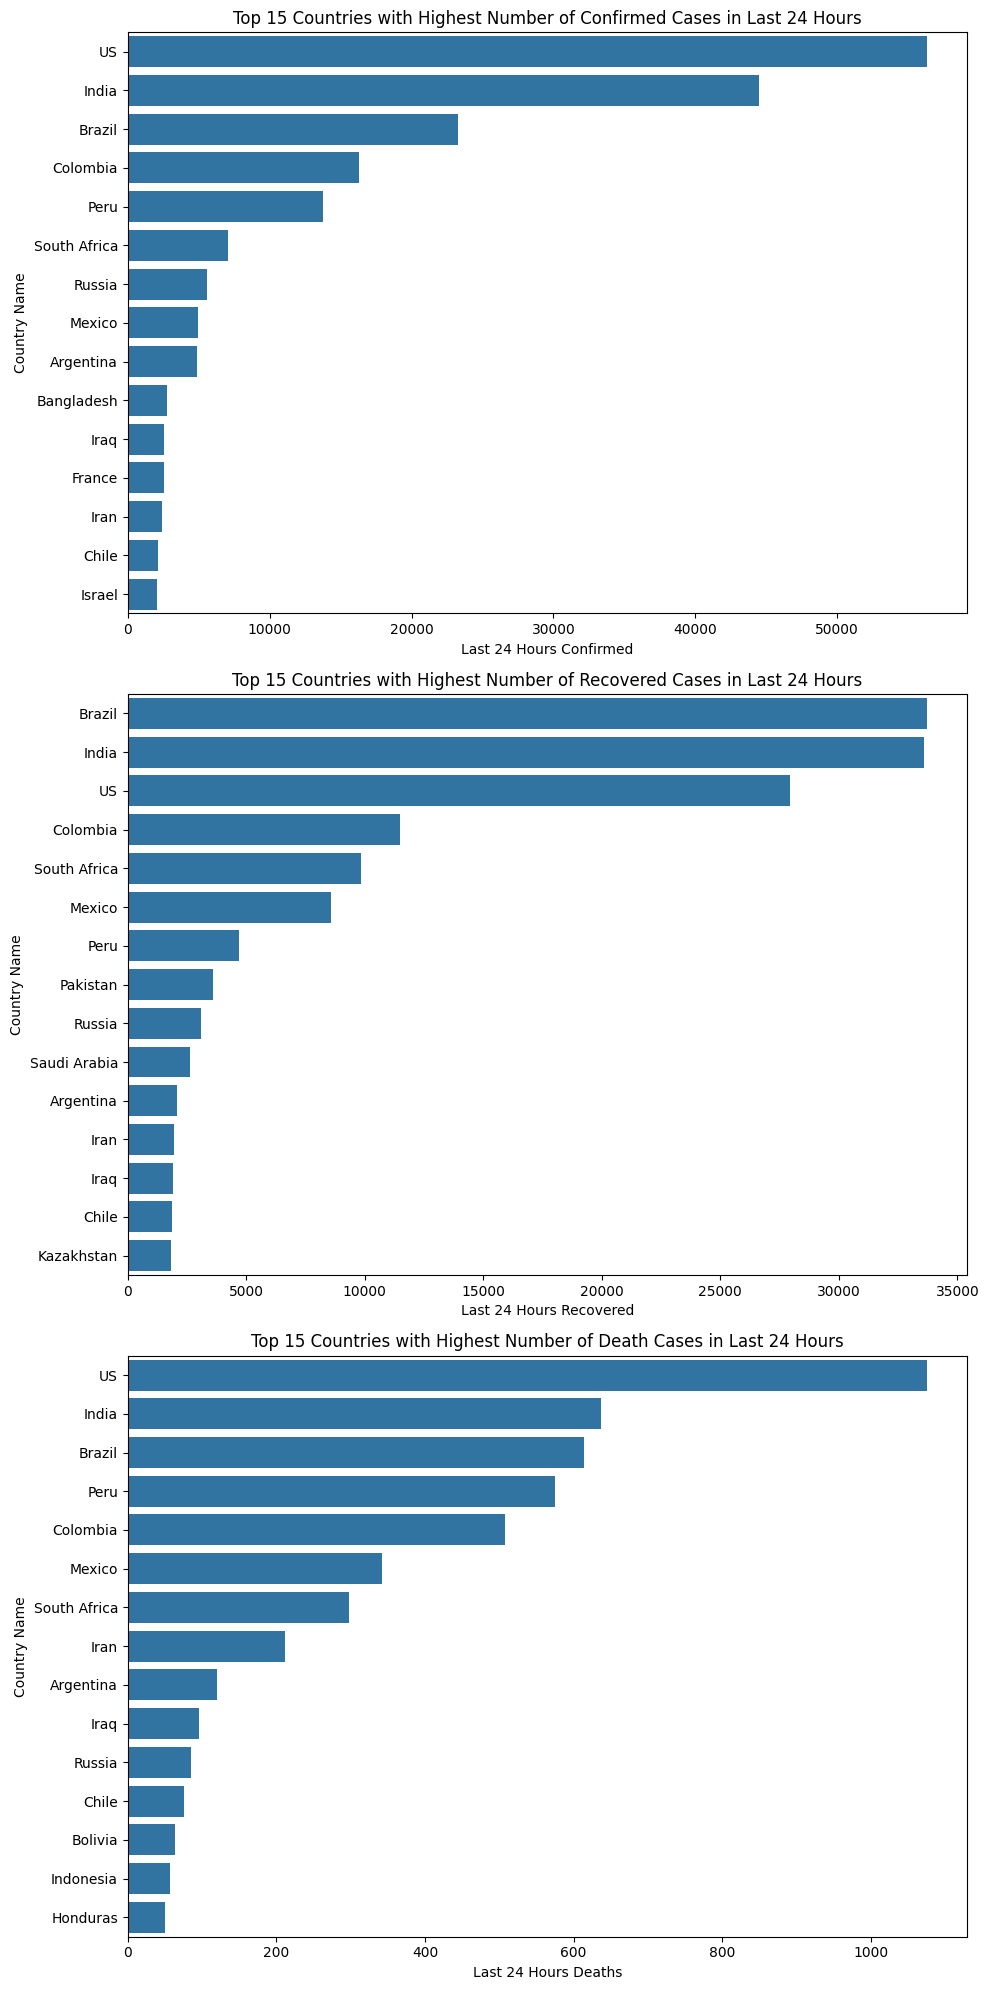

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get latest date data
countrywise = df_covid_19_clean_complete[df_covid_19_clean_complete["Date"] == df_covid_19_clean_complete["Date"].max()]
countrywise = countrywise.groupby(["Country/Region"]).agg({"Confirmed": 'sum', "Recovered": 'sum', "Deaths": 'sum'})
countrywise = countrywise.sort_values(["Confirmed"], ascending=False)

# Calculate mortality and recovery rates
countrywise["Mortality"] = (countrywise["Deaths"] / countrywise["Confirmed"]) * 100
countrywise["Recovery"] = (countrywise["Recovered"] / countrywise["Confirmed"]) * 100

# Calculate last 24-hour changes
country_last_24_confirmed = []
country_last_24_recovered = []
country_last_24_deaths = []

for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1] - grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1] - grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1] - grouped_country.loc[country].iloc[-2])["Deaths"])

# Create DataFrame for last 24-hour changes
Last_24_Hours_country = pd.DataFrame(
    list(zip(countrywise.index, country_last_24_confirmed, country_last_24_recovered, country_last_24_deaths)),
    columns=["Country Name", "Last 24 Hours Confirmed", "Last 24 Hours Recovered", "Last 24 Hours Deaths"]
)

# Get Top 15 countries
Top_15_Confirmed_24hr = Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"], ascending=False).head(15)
Top_15_Recovered_24hr = Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"], ascending=False).head(15)
Top_15_Deaths_24hr = Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"], ascending=False).head(15)

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))

sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"], y=Top_15_Confirmed_24hr["Country Name"], ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")

sns.barplot(x=Top_15_Recovered_24hr["Last 24 Hours Recovered"], y=Top_15_Recovered_24hr["Country Name"], ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")

sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"], y=Top_15_Deaths_24hr["Country Name"], ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

plt.tight_layout()
plt.show()


In [11]:
Last_24_Hours_country["Proportion of Confirmed"]=(Last_24_Hours_country["Last 24 Hours Confirmed"]/(datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Recovered"]=(Last_24_Hours_country["Last 24 Hours Recovered"]/(datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Deaths"]=(Last_24_Hours_country["Last 24 Hours Deaths"]/(datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2]))*100

Last_24_Hours_country[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
0,US,24.634329,16.000756,19.870729
2,India,19.439938,19.240306,11.763620
1,Brazil,10.181513,19.314752,11.338873
13,Colombia,7.130207,6.582180,9.381348
6,Peru,6.015156,2.689795,10.618652
4,South Africa,3.102904,5.639578,5.503232
3,Russia,2.451801,1.762082,1.569714
5,Mexico,2.174569,4.918023,6.315789
19,Argentina,2.138275,1.177966,2.216066
16,Bangladesh,1.212127,1.031365,0.683287


Text(0.5, 0, 'Recovery (in Percentage)')

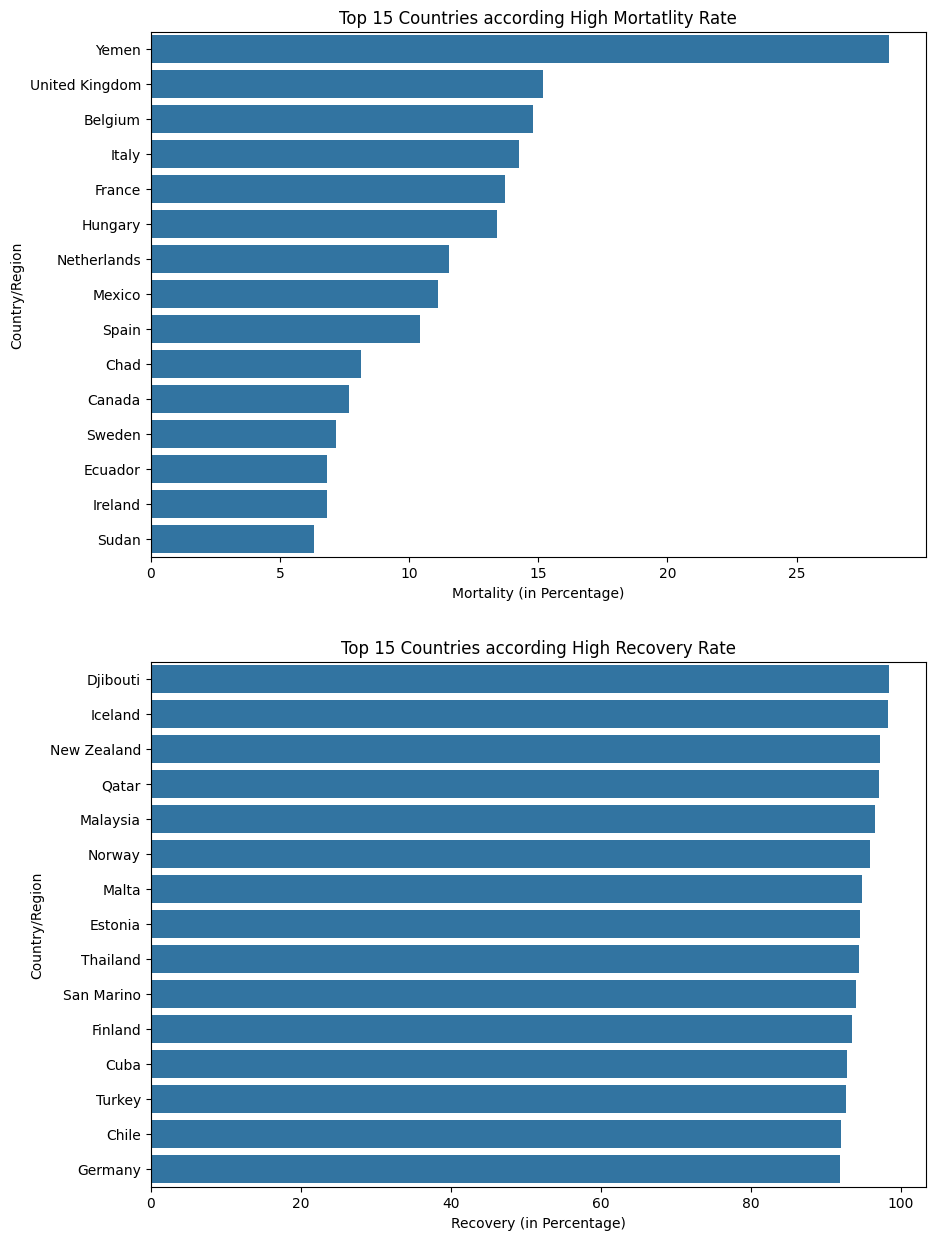

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

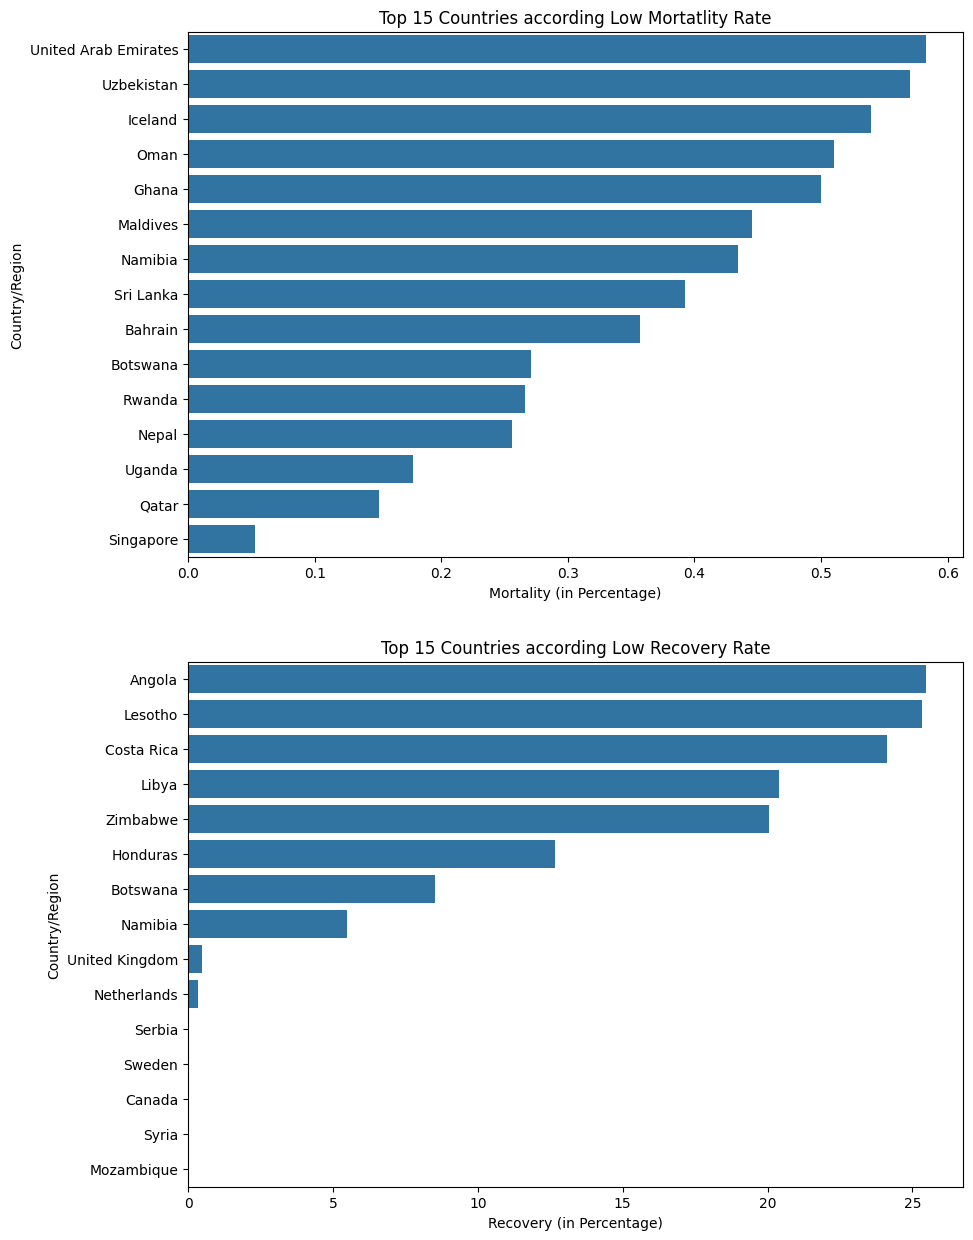

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

In [14]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')



,Confirmed,Deaths,Mortality Rate
Country/Region,,,
Canada,116458,8944,7.680022
Sweden,79395,5700,7.179293
Syria,674,40,5.934718
Serbia,24141,543,2.249285
Mozambique,1701,11,0.646678


In [15]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Vietnam,431,365,0,0.000000,84.686775
Mongolia,289,222,0,0.000000,76.816609
Eritrea,265,191,0,0.000000,72.075472
Cambodia,226,147,0,0.000000,65.044248
Seychelles,114,39,0,0.000000,34.210526


Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

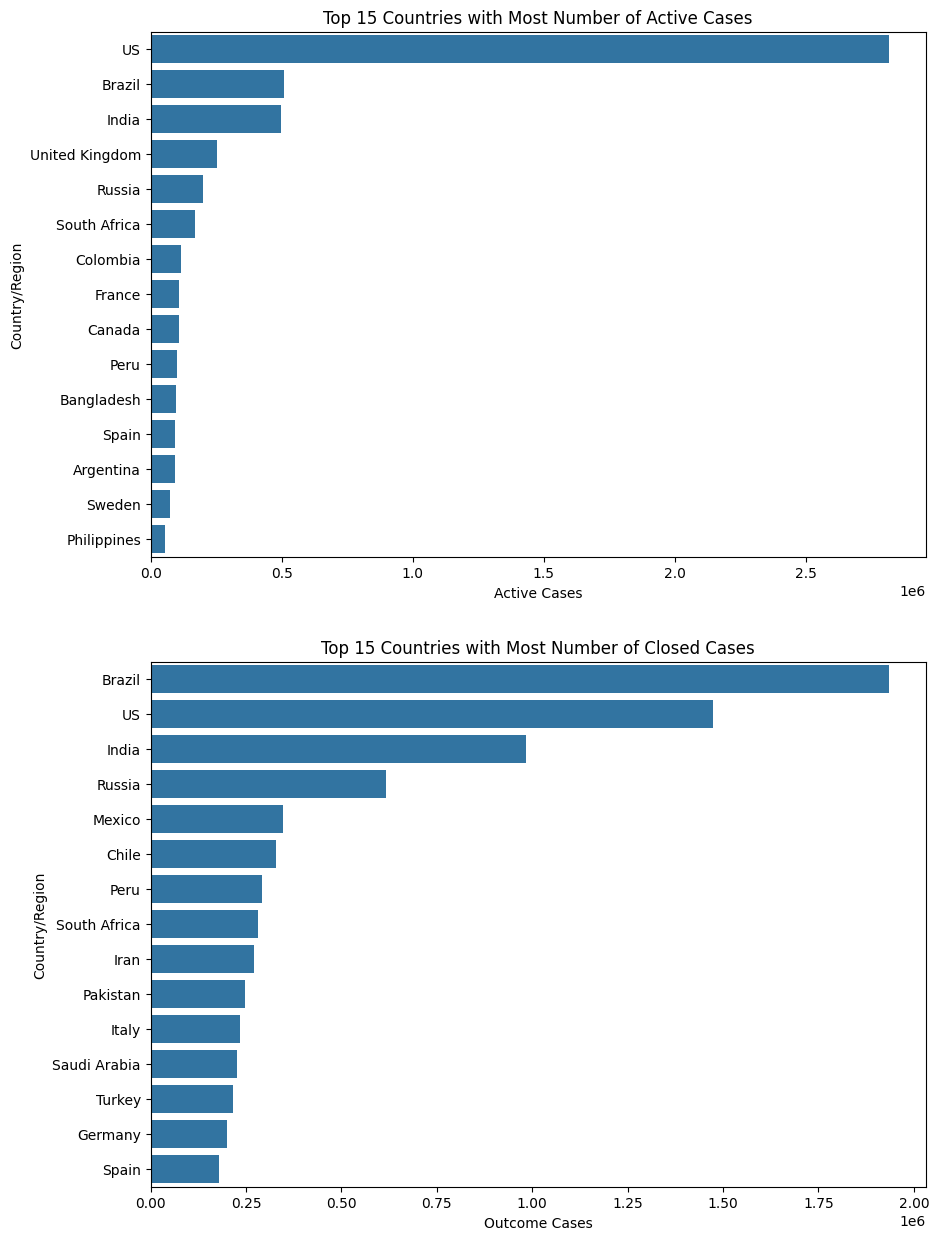

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

Mean Survival Probability across all countries 96.98068304748519
Median Survival Probability across all countries 97.84837733146708
Mean Death Probability across all countries 3.0193169525148136
Median Death Probability across all countries 2.151622668532923


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

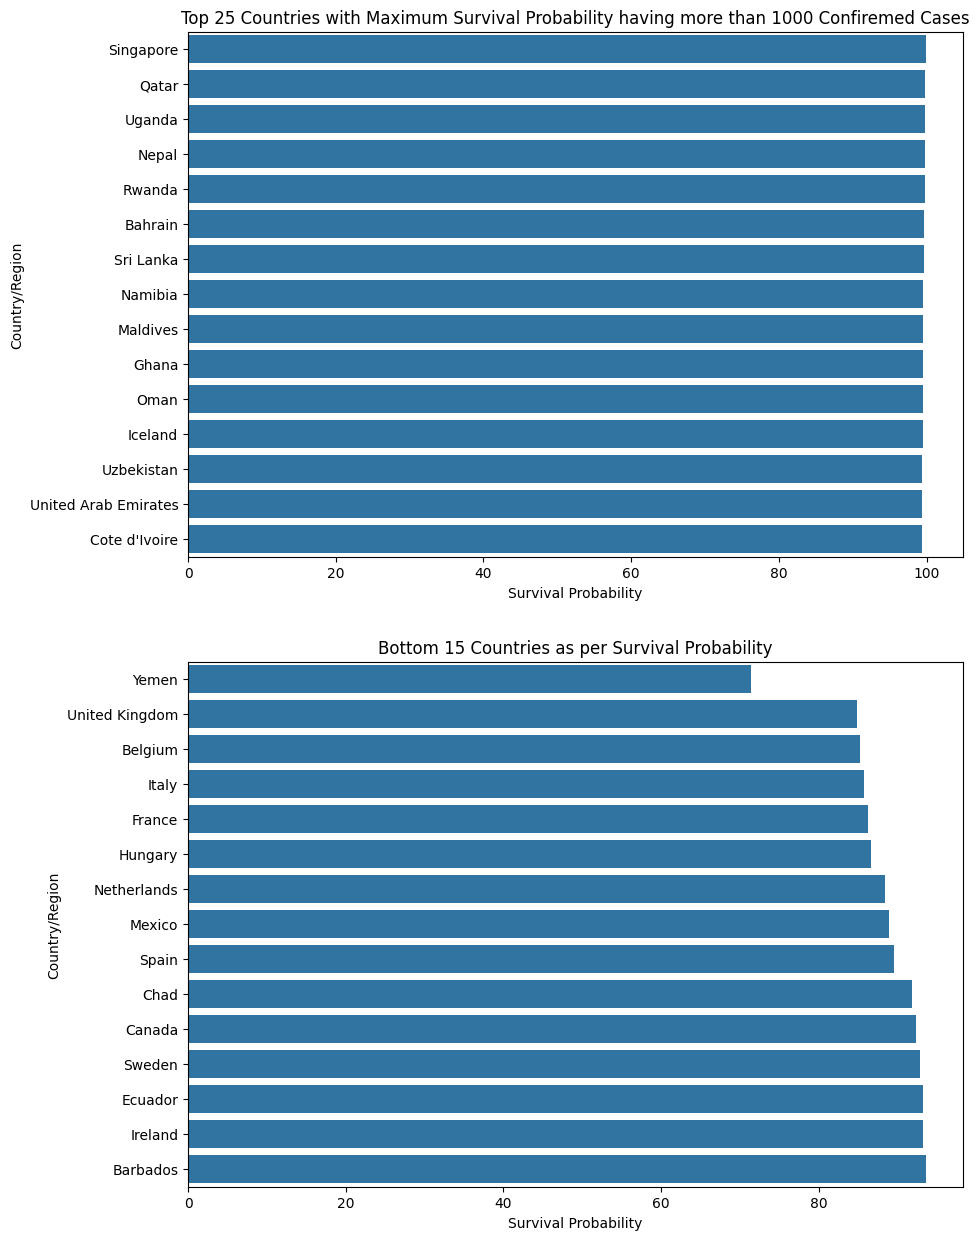

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

In [18]:
from sklearn.preprocessing import StandardScaler
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
std = StandardScaler()
X=std.fit_transform(X)
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Survival Probability
Country/Region,,,,,,,,
US,4290259,1325804,148011,3.449932,30.902656,2816444,1473815,96.550068
Brazil,2442375,1846641,87618,3.587410,75.608414,508116,1934259,96.412590
India,1480073,951166,33408,2.257186,64.264803,495499,984574,97.742814
Russia,816680,602249,13334,1.632708,73.743572,201097,615583,98.367292
South Africa,452529,274925,7067,1.561668,60.753013,170537,281992,98.438332
...,...,...,...,...,...,...,...,...
Dominica,18,18,0,0.000000,100.000000,0,18,100.000000
Saint Kitts and Nevis,17,15,0,0.000000,88.235294,2,15,100.000000
Greenland,14,13,0,0.000000,92.857143,1,13,100.000000


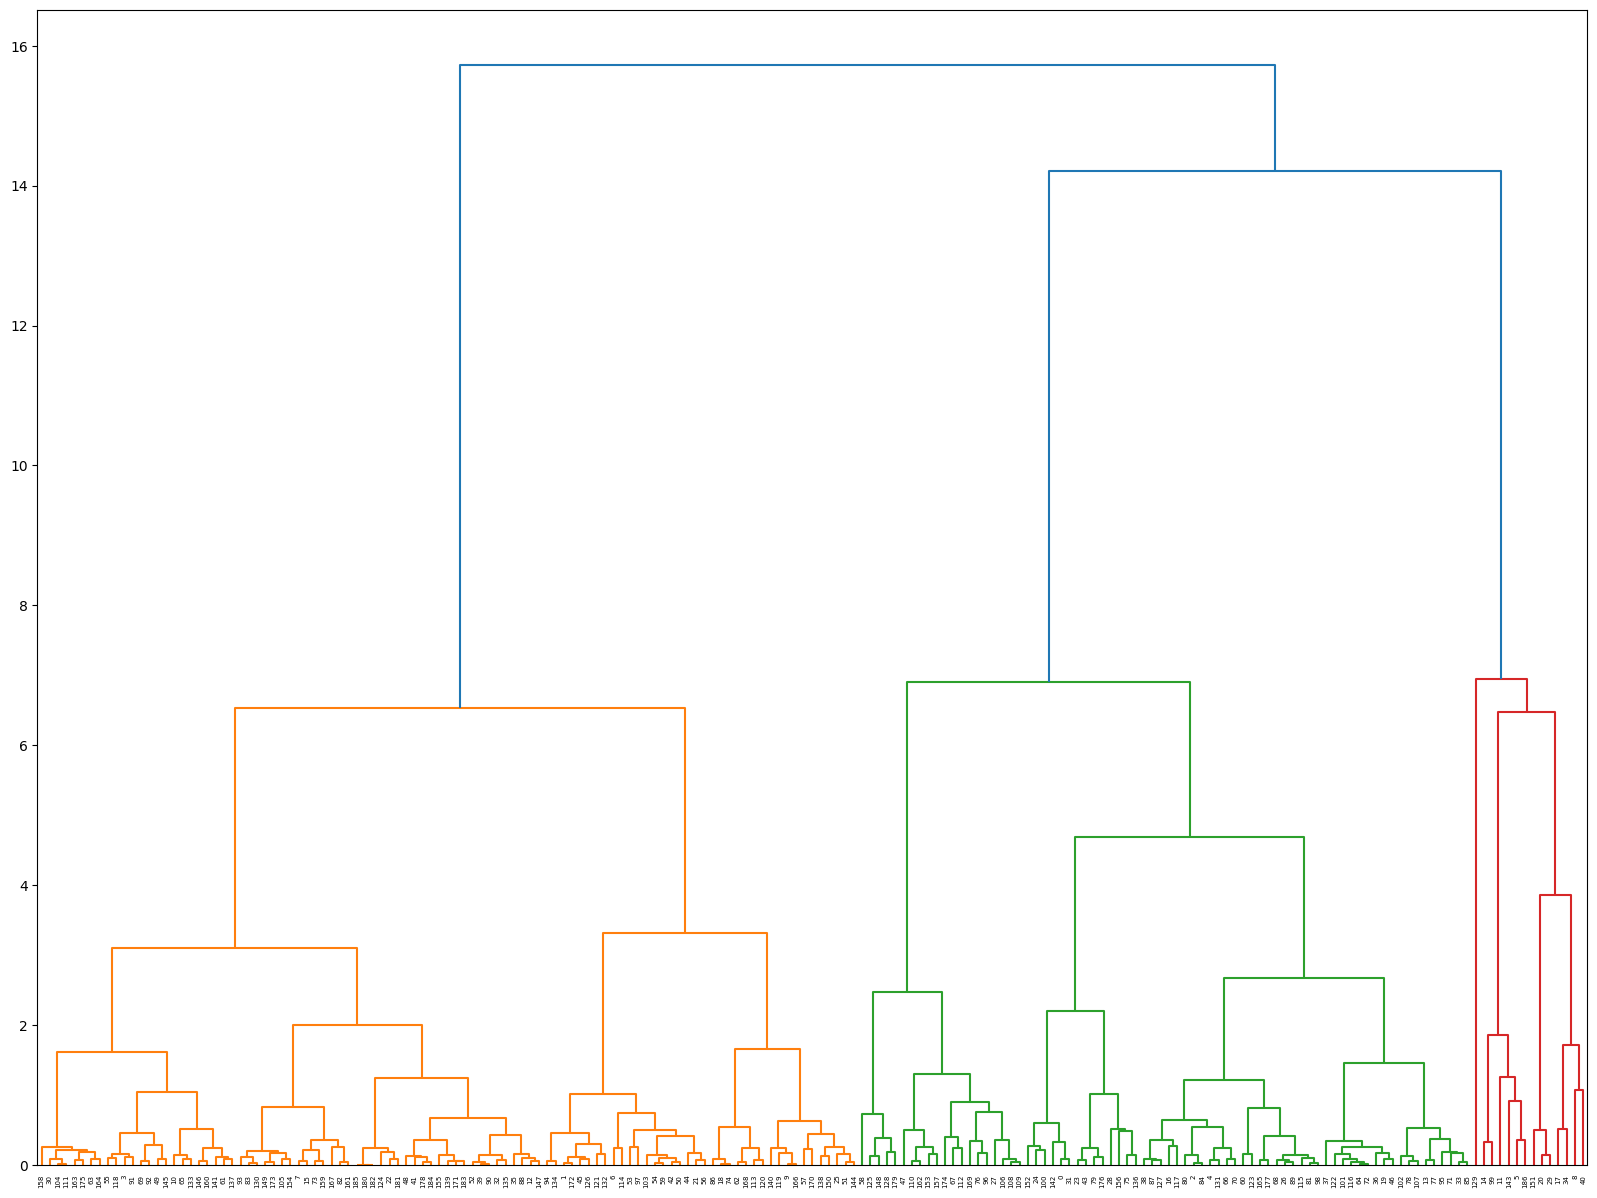

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

Hierarchical Clustering shows K=3 will correct number of clusters.

In [20]:
from sklearn.cluster import KMeans
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [24]:
countrywise["Clusters"]=clf_final.predict(X)
# countrywise.drop(columns=["WHO Region"])
countrywise


,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Survival Probability,Clusters
Country/Region,,,,,,,,,
US,4290259,1325804,148011,3.449932,30.902656,2816444,1473815,96.550068,1
Brazil,2442375,1846641,87618,3.587410,75.608414,508116,1934259,96.412590,0
India,1480073,951166,33408,2.257186,64.264803,495499,984574,97.742814,0
Russia,816680,602249,13334,1.632708,73.743572,201097,615583,98.367292,0
South Africa,452529,274925,7067,1.561668,60.753013,170537,281992,98.438332,0
...,...,...,...,...,...,...,...,...,...
Dominica,18,18,0,0.000000,100.000000,0,18,100.000000,0
Saint Kitts and Nevis,17,15,0,0.000000,88.235294,2,15,100.000000,0
Greenland,14,13,0,0.000000,92.857143,1,13,100.000000,0


In [25]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')



,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Survival Probability,Clusters
Country/Region,,,,,,,,,
US,4290259,1325804,148011,3.449932,30.902656,2816444,1473815,96.550068,1
Colombia,257101,131161,8777,3.413833,51.015360,117163,139938,96.586167,1
Bangladesh,226225,125683,2965,1.310642,55.556636,97577,128648,98.689358,1
Argentina,167416,72575,3059,1.827185,43.350098,91782,75634,98.172815,1
Canada,116458,0,8944,7.680022,0.000000,107514,8944,92.319978,1
Indonesia,100303,58173,4838,4.823385,57.997268,37292,63011,95.176615,1
Egypt,92482,34838,4652,5.030168,37.670033,52992,39490,94.969832,1
Philippines,82040,26446,1945,2.370795,32.235495,53649,28391,97.629205,1
Ecuador,81161,34896,5532,6.816082,42.996020,40733,40428,93.183918,1


In [28]:
print("Avergae Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(10).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(10).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(10).index))

Avergae Mortality Rate of Cluster 0:  2.2149254363429627
Avergae Recovery Rate of Cluster 0:  81.25850156869187
Avergae Mortality Rate of Cluster 1:  2.707583315663142
Avergae Recovery Rate of Cluster 1:  35.55738862965622
Avergae Mortality Rate of Cluster 2:  14.301099512835453
Avergae Recovery Rate of Cluster 2:  48.07149792571852
Few Countries belonging to Cluster 0:  ['Brazil', 'India', 'Russia', 'South Africa', 'Peru', 'Chile', 'Iran', 'Pakistan', 'Saudi Arabia', 'Turkey']
Few Countries belonging to Cluster 1:  ['US', 'Colombia', 'Bangladesh', 'Argentina', 'Canada', 'Indonesia', 'Egypt', 'Philippines', 'Ecuador', 'Sweden']
Few Countries belonging to Cluster 2:  ['Mexico', 'United Kingdom', 'Spain', 'Italy', 'France', 'Belgium', 'Netherlands', 'Hungary', 'Yemen', 'Western Sahara']


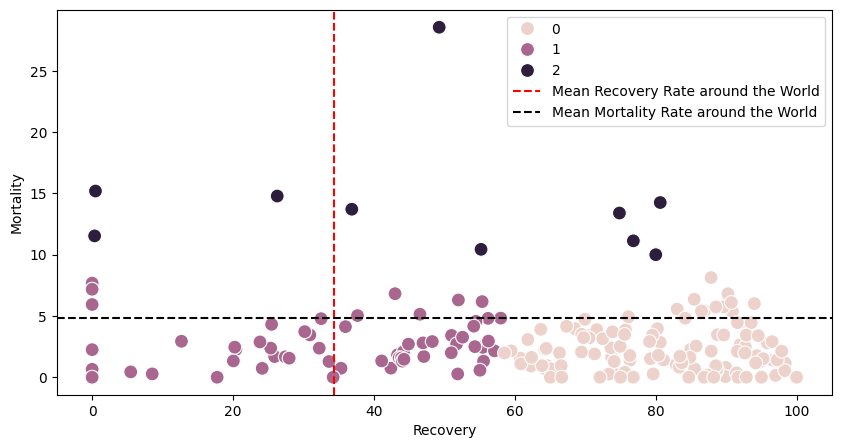

In [29]:
datewise.drop(columns=["Province/State" , "Country/Region" , "WHO Region"])
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

In [30]:
india_data=df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"]=="India"]
datewise_india=india_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    1480073
Recovered     951166
Deaths         33408
Name: 2020-07-27 00:00:00, dtype: int64
Total Active Cases:  495499
Total Closed Cases:  984574


In [31]:
fig = px.line(india_data, x="Date", y=["Deaths" , "Confirmed" , "Recovered"],
              title="Growth of different types of Cases Over Time",
              )
fig.show()

fig = px.line(datewise_india.reset_index(), x="Date", y= datewise_india["Confirmed"] - datewise_india["Recovered"] - datewise_india["Deaths"] ,
              title="India active cases Over Time",
              )
fig.show()

In [32]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_confirm,
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_recover,
                    mode='lines',

                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_deaths,
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<ipython-input-32-f9156d71f9ad>:5: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-32-f9156d71f9ad>:6: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-32-f9156d71f9ad>:7: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-32-f9156d71f9ad>:5: RuntimeWarning:

divide by zero encountered in scalar divide

<ipython-input-32-f9156d71f9ad>:6: RuntimeWarning:

divide by zero encountered in scalar divide

<ipython-input-32-f9156d71f9ad>:7: RuntimeWarning:

divide by zero encountered in scalar divide



In [33]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [87]:
grouped_India = df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"] == "India"]

fig = px.line(grouped_India, x="Date", y="Deaths",
              title="India Deaths Cases Over Time",
              )
fig.show()

grouped_US = df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"] == "US"]

fig = px.line(grouped_US, x="Date", y="Deaths",
              title="USA Deaths Cases Over Time",
              )
fig.show()


grouped_China = df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"] == "China"]
grouped_China = grouped_China.groupby("Date", as_index=False).sum()
fig = px.line(grouped_China, x="Date", y="Deaths",
              title="China Deaths Cases Over Time",
              )
fig.show()




In [94]:
latest_date = df_covid_19_clean_complete["Date"].max()  # Find the most recent date
countrywise2 = countrywise
corrections = {
    'AustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustralia': 'Australia',
    'CanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanada': 'Canada',
    'ChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChina': 'China',
    'FranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFrance': 'France',
    'NetherlandsNetherlandsNetherlandsNetherlands': 'Netherlands',
    'United KingdomUnited KingdomUnited KingdomUnited KingdomUnited KingdomUnited KingdomUnited KingdomUnited KingdomUnited KingdomUnited KingdomUnited Kingdom': 'United Kingdom'
}

# Replace incorrect values in the dataframe
countrywise2["Country/Region"] = countrywise2["Country/Region"].replace(corrections)
countrywise2


fig = px.choropleth(countrywise2, locations="Country/Region",
                    locationmode='country names', color="Deaths",
                    hover_name="Country/Region", range_color=[1,5000],
                    color_continuous_scale="peach",
                    title='Countries with Deaths Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [74]:
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus',
    'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
    'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
    'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
    'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

asia_grouped_latest = country_grouping[country_grouping['Country/Region'].isin(asia)]
fig = px.choropleth(asia_grouped_latest, locations="Country/Region",
                    locationmode='country names', color="Deaths",
                    hover_name="Country/Region", range_color=[1,2000],
                    color_continuous_scale='portland',
                    title='Asian Countries with Deaths Cases', scope='asia', height=800)
# fig.update(layout_coloraxis_showscale=False)
fig.show()


In [77]:


fig = px.bar(asia_grouped_latest.sort_values('Deaths', ascending=False)[:10][::-1],
             x='Deaths', y='Country/Region', color_discrete_sequence=['#84DCC6'],
             title='Deaths Cases in Asia', text='Deaths', orientation='h')
fig.show()



In [79]:
grouped = df_covid_19_clean_complete.groupby("Date", as_index=False).sum()

fig = px.line(grouped, x="Date", y="Confirmed",
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="Date", y="Confirmed",
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time",
              log_y=True)
fig.show()


In [80]:
grouped_India = df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"] == "India"]

fig = px.line(grouped_India, x="Date", y="Confirmed",
              title="India Confirmed Cases Over Time",
              )
fig.show()

grouped_US = df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"] == "US"]

fig = px.line(grouped_US, x="Date", y="Confirmed",
              title="USA Confirmed Cases Over Time",
              )
fig.show()


grouped_China = df_covid_19_clean_complete[df_covid_19_clean_complete["Country/Region"] == "China"]
grouped_China = grouped_China.groupby("Date", as_index=False).sum()
fig = px.line(grouped_China, x="Date", y="Confirmed",
              title="China Confirmed Cases Over Time",
              )
fig.show()




In [82]:
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus',
    'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
    'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
    'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
    'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

asia_grouped_latest = country_grouping[country_grouping['Country/Region'].isin(asia)]
fig = px.choropleth(asia_grouped_latest, locations="Country/Region",
                    locationmode='country names', color="Confirmed",
                    hover_name="Country/Region", range_color=[1,2000],
                    color_continuous_scale='portland',
                    title='Asian Countries with Confirmed Cases', scope='asia', height=800)
# fig.update(layout_coloraxis_showscale=False)
fig.show()


In [84]:


fig = px.bar(asia_grouped_latest.sort_values('Confirmed', ascending=False)[:10][::-1],
             x='Confirmed', y='Country/Region', color_discrete_sequence=['#84DCC6'],
             title='Confirmed Cases in Asia', text='Confirmed', orientation='h')
fig.show()


**Prediction using Machine Learning Models**

Linear Regression Model for Confirm Cases Prediction

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

lin_reg=LinearRegression()

datewise["Days Since"]=datewise.index-datewise.index[0]
# datewise["Days Since"]=datewise["Days Since"].dt.days

In [50]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression()

In [51]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  4626592.381969578


In [43]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='white', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 8)
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]
linreg=LinearRegression()
linreg.fit(train_poly,y)

LinearRegression()

In [47]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  942088.663402392


In [53]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='white', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

SVM prediction

In [56]:
from sklearn.svm import SVR
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='white', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Root Mean Square Error for Support Vectore Machine:  4686932.662801556


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<Figure size 1100x600 with 0 Axes>

Holt's linear model

In [63]:
from statsmodels.tsa.holtwinters import Holt
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid =datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred = valid.copy()
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)

<ipython-input-63-22ba9794a792>:5: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.



In [64]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  112475.62664968331


In [65]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [68]:
df_day_wise = pd.read_csv ("/content/day_wise.csv")
df_day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [69]:
df_full_grouped = pd.read_csv ("/content/full_grouped.csv")
df_full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [70]:
df_usa_county_wise = pd.read_csv ("/content/usa_county_wise.csv")
df_usa_county_wise.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [71]:
df_worldometer_data = pd.read_csv ("/content/worldometer_data.csv")
df_worldometer_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
